In [1]:
from utils.layer_utils import *
from utils.model_utils import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import pickle
from tensorflow.keras.models import model_from_json 
import tensorflow.keras as keras

In [2]:
#load CIFAR10 data
%%time
(train_data, train_label), (val_data, val_label) =  keras.datasets.cifar10.load_data()

CPU times: user 3.96 s, sys: 583 ms, total: 4.54 s
Wall time: 703 ms


In [4]:
print('Training data shape: ', train_data.shape)
print('Training labels shape: ', train_label.shape)
print('Validation data shape: ', val_data.shape)
print('Validation labels shape: ', val_label.shape)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000, 1)
Validation data shape:  (10000, 32, 32, 3)
Validation labels shape:  (10000, 1)


In [5]:
#process data labels into categorical values
train_label = keras.utils.to_categorical(train_label)
val_label = keras.utils.to_categorical(val_label)

In [7]:
#Generator function yields batches of data after scaling them to compatible size and normalizing them
def generator(X, y, batch_size, shuffle, scale=7):
    base_gen = keras.preprocessing.image.ImageDataGenerator()
    for X_base, y_base in base_gen.flow(X, y, batch_size=batch_size, shuffle=shuffle):
        X_batch = np.zeros((X_base.shape[0], X_base.shape[1]*scale,
                            X_base.shape[2]*scale, X_base.shape[3]), np.float32)
        for i in range(X_base.shape[0]):
            with Image.fromarray(X_base[i].astype(np.uint8)) as img:
                img = img.resize((X_base.shape[1]*scale, X_base.shape[2]*scale), Image.LANCZOS)
                X_batch[i] = np.asarray(img, np.float32) / 255.0
        yield X_batch, y_base

In [8]:
#Define training parameters
%%time
n_classes = 10
bs = 64 #batch size
epc = 20 #number of epoches
train_generator = generator(train_data, train_label, bs,True)
val_generator = generator(val_data, val_label, bs,True)
# train_datagen=ImageDataGenerator()
# train_generator = train_datagen.flow(train_data_1, train_label_1, batch_size=bs)
step_size_train = train_data.shape[0]//bs
validation_steps=val_data.shape[0]//1000

CPU times: user 8 µs, sys: 1e+03 ns, total: 9 µs
Wall time: 11.7 µs


In [9]:
#Define and compile PeleeNet model, training optimizer and loss metric
%%time
m6=PeleeNet(input_shape=(224,224,3), n_classes=n_classes)
m6.compile(optimizer= 'Adam',loss='categorical_crossentropy',metrics=['accuracy'])
m6.summary()

Instructions for updating:
Colocations handled automatically by placer.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 112, 112, 32) 896         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_v1 (BatchNo (None, 112, 112, 32) 128         conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 112, 112, 32) 0           batch_normalization_v1[0][0]     
_____________________________________

In [10]:
#training of model and plot loss and accuracy
%%time
history_6 = m6.fit_generator(generator = train_generator,
                   steps_per_epoch = step_size_train,
                   epochs = epc,
                   validation_data=val_generator,validation_steps = validation_steps)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
781/781 [==============================] - 232s 297ms/step - loss: 2.8904 - acc: 0.5336 - val_loss: 2.2786 - val_acc: 0.4812
Epoch 2/20
781/781 [==============================] - 186s 238ms/step - loss: 1.4402 - acc: 0.7164 - val_loss: 1.6565 - val_acc: 0.6000
Epoch 3/20
781/781 [==============================] - 186s 238ms/step - loss: 1.1546 - acc: 0.7678 - val_loss: 1.8798 - val_acc: 0.5531
Epoch 4/20
781/781 [==============================] - 185s 237ms/step - loss: 1.0398 - acc: 0.7914 - val_loss: 1.4986 - val_acc: 0.6203
Epoch 5/20
781/781 [==============================] - 186s 239ms/step - loss: 0.9613 - acc: 0.8076 - val_loss: 1.4978 - val_acc: 0.6516
Epoch 6/20
781/781 [==============================] - 187s 240ms/step - loss: 0.9056 - acc: 0.8182 - val_loss: 1.2636 - val_acc: 0.7172
Epoch 7/20
781/781 [==============================] - 187s 240ms/step - loss: 0.8577 - acc: 0.8316 - val_loss: 1.2978 - val_acc: 0.7250


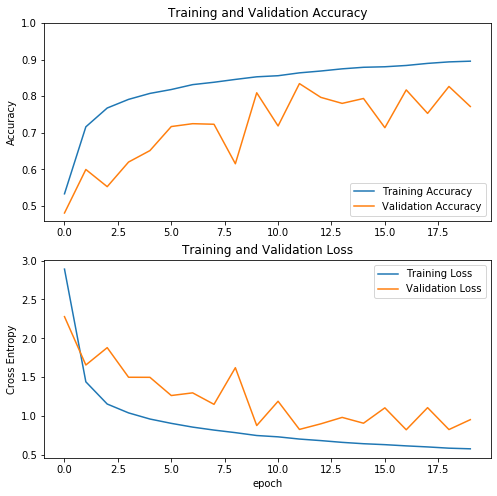

In [11]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

acc = history_6.history['acc']
val_acc = history_6.history['val_acc']

loss = history_6.history['loss']
val_loss = history_6.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')

plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [17]:
%%time
# serialize weights to HDF5
m6.save_weights("./models/cifar/m6.h5")
print("Saved model to disk")

Saved model to disk
CPU times: user 1min 14s, sys: 0 ns, total: 1min 14s
Wall time: 1min 14s


In [10]:
#Define and compile model, training optimizer and loss metric
%%time
m5=model5(input_shape=(224,224,3), n_classes=n_classes)
m5.compile(optimizer= 'Adam',loss='categorical_crossentropy',metrics=['accuracy'])
m5.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv2d_113 (Conv2D)             (None, 112, 112, 32) 896         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_v1_113 (Bat (None, 112, 112, 32) 128         conv2d_113[0][0]                 
__________________________________________________________________________________________________
activation_113 (Activation)     (None, 112, 112, 32) 0           batch_normalization_v1_113[0][0] 
__________________________________________________________________________________________________
conv2d_114

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
781/781 [==============================] - 213s 272ms/step - loss: 2.8123 - acc: 0.5449 - val_loss: 2.5348 - val_acc: 0.4516
Epoch 2/20
781/781 [==============================] - 190s 243ms/step - loss: 1.4548 - acc: 0.7187 - val_loss: 1.6960 - val_acc: 0.6156
Epoch 3/20
781/781 [==============================] - 189s 242ms/step - loss: 1.1520 - acc: 0.7694 - val_loss: 1.2653 - val_acc: 0.7469
Epoch 4/20
781/781 [==============================] - 189s 243ms/step - loss: 1.0338 - acc: 0.7914 - val_loss: 1.8546 - val_acc: 0.5609
Epoch 5/20
781/781 [==============================] - 190s 243ms/step - loss: 0.9585 - acc: 0.8074 - val_loss: 1.3579 - val_acc: 0.6828
Epoch 6/20
781/781 [==============================] - 189s 242ms/step - loss: 0.8952 - acc: 0.8206 - val_loss: 1.3194 - val_acc: 0.6641
Epoch 7/20
781/781 [==============================] - 190s 243ms/step - loss: 0.8567 - acc: 0.8295 - val_loss: 1.1626 - val_acc: 0.7203


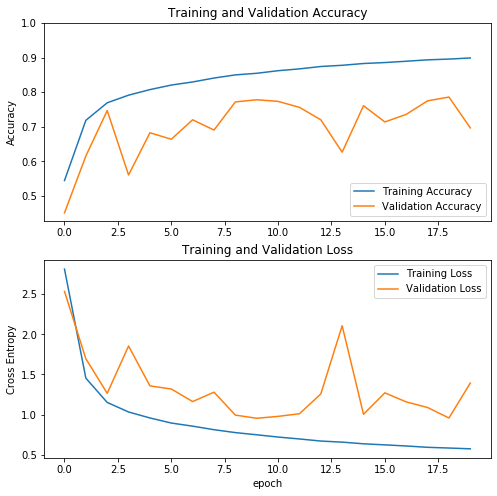

CPU times: user 1h 18min 45s, sys: 15min 30s, total: 1h 34min 16s
Wall time: 1h 4min 16s


In [10]:
#training of model and plot loss and accuracy
%%time
history_5 = m5.fit_generator(generator = train_generator,
                   steps_per_epoch = step_size_train,
                   epochs = epc,
                   validation_data=val_generator,validation_steps = validation_steps)

%matplotlib inline
%load_ext autoreload
%autoreload 2

acc = history_5.history['acc']
val_acc = history_5.history['val_acc']

loss = history_5.history['loss']
val_loss = history_5.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')

plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [11]:
%%time
# serialize weights to HDF5
m5.save_weights("./models/cifar/m5.h5")
print("Saved model to disk")

Saved model to disk
CPU times: user 1min 20s, sys: 68.1 ms, total: 1min 20s
Wall time: 1min 20s


In [11]:
#Define and compile model, training optimizer and loss metric
%%time
m4=model4(input_shape=(224,224,3), n_classes=n_classes)
m4.compile(optimizer= 'Adam',loss='categorical_crossentropy',metrics=['accuracy'])
m4.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
activation_211 (Activation)     (None, 224, 224, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_v1_211 (Bat (None, 224, 224, 3)  12          activation_211[0][0]             
__________________________________________________________________________________________________
conv2d_211 (Conv2D)             (None, 112, 112, 32) 896         batch_normalization_v1_211[0][0] 
__________________________________________________________________________________________________
activation

Epoch 1/20
781/781 [==============================] - 128s 163ms/step - loss: 2.4053 - acc: 0.3117 - val_loss: 2.2031 - val_acc: 0.3641
Epoch 2/20
781/781 [==============================] - 121s 154ms/step - loss: 2.0170 - acc: 0.4376 - val_loss: 2.1364 - val_acc: 0.3781
Epoch 3/20
781/781 [==============================] - 121s 154ms/step - loss: 1.8077 - acc: 0.5053 - val_loss: 1.7684 - val_acc: 0.5516
Epoch 4/20
781/781 [==============================] - 121s 156ms/step - loss: 1.6528 - acc: 0.5486 - val_loss: 1.5973 - val_acc: 0.5797
Epoch 5/20
781/781 [==============================] - 121s 155ms/step - loss: 1.5261 - acc: 0.5876 - val_loss: 1.4950 - val_acc: 0.6000
Epoch 6/20
781/781 [==============================] - 121s 155ms/step - loss: 1.4342 - acc: 0.6171 - val_loss: 1.5144 - val_acc: 0.5969
Epoch 7/20
781/781 [==============================] - 121s 154ms/step - loss: 1.3564 - acc: 0.6439 - val_loss: 1.4812 - val_acc: 0.6266
Epoch 8/20
781/781 [============================

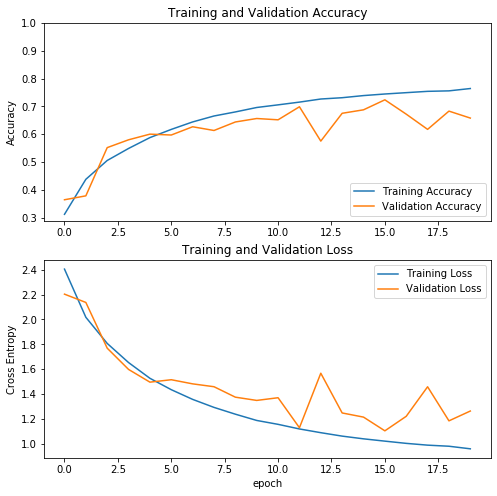

CPU times: user 54min 8s, sys: 12min 40s, total: 1h 6min 49s
Wall time: 41min


In [13]:
#training of model and plot loss and accuracy
%%time
history_4 = m4.fit_generator(generator = train_generator,
                   steps_per_epoch = step_size_train,
                   epochs = epc,
                   validation_data=val_generator,validation_steps = validation_steps)

%matplotlib inline
%load_ext autoreload
%autoreload 2

acc = history_4.history['acc']
val_acc = history_4.history['val_acc']

loss = history_4.history['loss']
val_loss = history_4.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')

plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [14]:
%%time
# serialize weights to HDF5
m4.save_weights("./models/cifar/m4.h5")
print("Saved model to disk")

Saved model to disk
CPU times: user 59.5 s, sys: 0 ns, total: 59.5 s
Wall time: 59.4 s


In [12]:
#Define and compile model, training optimizer and loss metric
%%time
m3=model3(input_shape=(224,224,3), n_classes=n_classes)
m3.compile(optimizer= 'Adam',loss='categorical_crossentropy',metrics=['accuracy'])
m3.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
activation_255 (Activation)     (None, 224, 224, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_v1_255 (Bat (None, 224, 224, 3)  12          activation_255[0][0]             
__________________________________________________________________________________________________
conv2d_255 (Conv2D)             (None, 224, 224, 16) 64          batch_normalization_v1_255[0][0] 
__________________________________________________________________________________________________
activation

Epoch 1/20
781/781 [==============================] - 406s 519ms/step - loss: 2.2185 - acc: 0.3463 - val_loss: 2.1133 - val_acc: 0.4016
Epoch 2/20
781/781 [==============================] - 397s 508ms/step - loss: 1.8636 - acc: 0.4689 - val_loss: 1.7880 - val_acc: 0.4916
Epoch 3/20
781/781 [==============================] - 397s 508ms/step - loss: 1.6793 - acc: 0.5286 - val_loss: 1.7583 - val_acc: 0.4766
Epoch 4/20
781/781 [==============================] - 397s 508ms/step - loss: 1.5526 - acc: 0.5643 - val_loss: 1.8075 - val_acc: 0.4688
Epoch 5/20
781/781 [==============================] - 397s 508ms/step - loss: 1.4601 - acc: 0.5909 - val_loss: 1.6977 - val_acc: 0.5000
Epoch 6/20
781/781 [==============================] - 397s 508ms/step - loss: 1.3819 - acc: 0.6122 - val_loss: 1.4581 - val_acc: 0.5828
Epoch 7/20
781/781 [==============================] - 397s 508ms/step - loss: 1.3296 - acc: 0.6235 - val_loss: 1.4402 - val_acc: 0.5891
Epoch 8/20
781/781 [============================

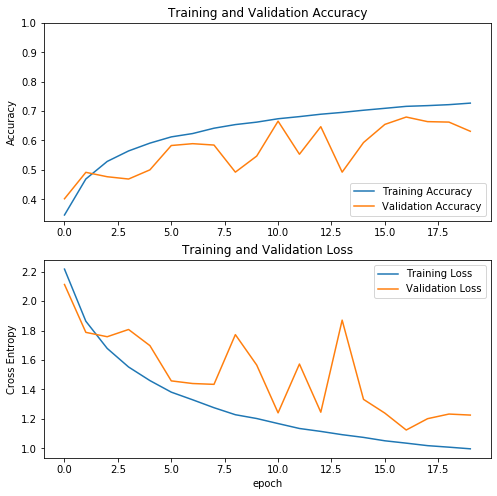

CPU times: user 1h 39min 18s, sys: 29min 48s, total: 2h 9min 7s
Wall time: 2h 12min 52s


In [16]:
#training of model and plot loss and accuracy
%%time
history_3 = m3.fit_generator(generator = train_generator,
                   steps_per_epoch = step_size_train,
                   epochs = epc,
                   validation_data=val_generator,validation_steps = validation_steps)

%matplotlib inline
%load_ext autoreload
%autoreload 2

acc = history_3.history['acc']
val_acc = history_3.history['val_acc']

loss = history_3.history['loss']
val_loss = history_3.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')

plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [17]:
%%time
# serialize weights to HDF5
m3.save_weights("./models/cifar/m3.h5")
print("Saved model to disk")

Saved model to disk
CPU times: user 1min 14s, sys: 0 ns, total: 1min 14s
Wall time: 1min 14s


In [13]:
#Define and compile model, training optimizer and loss metric
%%time
m1=model1(input_shape=(224,224,3), n_classes=n_classes)
m1.compile(optimizer= 'Adam',loss='categorical_crossentropy',metrics=['accuracy'])
m1.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
activation_295 (Activation)     (None, 224, 224, 3)  0           input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_v1_295 (Bat (None, 224, 224, 3)  12          activation_295[0][0]             
__________________________________________________________________________________________________
conv2d_295 (Conv2D)             (None, 224, 224, 32) 128         batch_normalization_v1_295[0][0] 
__________________________________________________________________________________________________
activation

Epoch 1/20
781/781 [==============================] - 423s 542ms/step - loss: 2.2316 - acc: 0.3254 - val_loss: 2.4435 - val_acc: 0.3031
Epoch 2/20
781/781 [==============================] - 414s 530ms/step - loss: 1.8924 - acc: 0.4616 - val_loss: 1.9730 - val_acc: 0.4875
Epoch 3/20
781/781 [==============================] - 414s 530ms/step - loss: 1.6932 - acc: 0.5330 - val_loss: 1.9118 - val_acc: 0.4578
Epoch 4/20
781/781 [==============================] - 414s 531ms/step - loss: 1.5793 - acc: 0.5652 - val_loss: 1.5678 - val_acc: 0.5875
Epoch 5/20
781/781 [==============================] - 414s 530ms/step - loss: 1.4898 - acc: 0.5909 - val_loss: 1.5273 - val_acc: 0.5750
Epoch 6/20
781/781 [==============================] - 414s 530ms/step - loss: 1.4170 - acc: 0.6089 - val_loss: 1.6277 - val_acc: 0.5422
Epoch 7/20
781/781 [==============================] - 414s 530ms/step - loss: 1.3443 - acc: 0.6286 - val_loss: 1.5759 - val_acc: 0.5676
Epoch 8/20
781/781 [============================

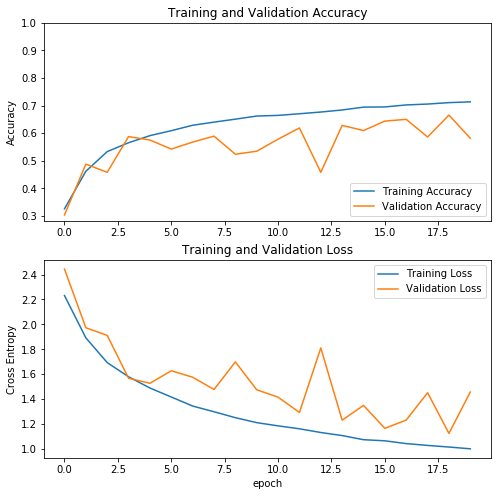

CPU times: user 1h 43min 4s, sys: 30min 31s, total: 2h 13min 36s
Wall time: 2h 18min 49s


In [19]:
#training of model and plot loss and accuracy
%%time
history_1 = m1.fit_generator(generator = train_generator,
                   steps_per_epoch = step_size_train,
                   epochs = epc,
                   validation_data=val_generator,validation_steps = validation_steps)

%matplotlib inline
%load_ext autoreload
%autoreload 2

acc = history_1.history['acc']
val_acc = history_1.history['val_acc']

loss = history_1.history['loss']
val_loss = history_1.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')

plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [20]:
%%time
# serialize weights to HDF5
m1.save_weights("./models/cifar/m1.h5")
print("Saved model to disk")

Saved model to disk
CPU times: user 1min 34s, sys: 0 ns, total: 1min 34s
Wall time: 1min 34s


In [14]:
#Define and compile model, training optimizer and loss metric
%%time
m0=DenseNet41(input_shape=(224,224,3), n_classes=10)
m0.compile(optimizer= 'Adam',loss='categorical_crossentropy',metrics=['accuracy'])
m0.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
activation_335 (Activation)     (None, 224, 224, 3)  0           input_6[0][0]                    
__________________________________________________________________________________________________
batch_normalization_v1_335 (Bat (None, 224, 224, 3)  12          activation_335[0][0]             
__________________________________________________________________________________________________
conv2d_335 (Conv2D)             (None, 224, 224, 64) 256         batch_normalization_v1_335[0][0] 
__________________________________________________________________________________________________
activation

Epoch 1/20
781/781 [==============================] - 516s 661ms/step - loss: 2.2817 - acc: 0.3374 - val_loss: 2.4359 - val_acc: 0.3297
Epoch 2/20
781/781 [==============================] - 506s 648ms/step - loss: 1.8901 - acc: 0.4723 - val_loss: 2.3583 - val_acc: 0.4125
Epoch 3/20
781/781 [==============================] - 506s 648ms/step - loss: 1.6930 - acc: 0.5347 - val_loss: 1.7336 - val_acc: 0.5031
Epoch 4/20
781/781 [==============================] - 506s 648ms/step - loss: 1.5467 - acc: 0.5755 - val_loss: 1.5819 - val_acc: 0.5531
Epoch 5/20
781/781 [==============================] - 506s 648ms/step - loss: 1.4389 - acc: 0.6066 - val_loss: 1.6419 - val_acc: 0.5188
Epoch 6/20
781/781 [==============================] - 506s 648ms/step - loss: 1.3444 - acc: 0.6280 - val_loss: 1.4368 - val_acc: 0.5703
Epoch 7/20
781/781 [==============================] - 506s 648ms/step - loss: 1.2739 - acc: 0.6459 - val_loss: 1.5141 - val_acc: 0.5391
Epoch 8/20
781/781 [============================

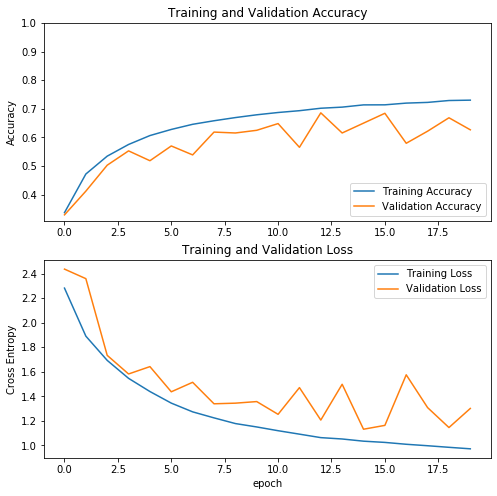

CPU times: user 1h 59min 2s, sys: 36min 28s, total: 2h 35min 31s
Wall time: 2h 49min 41s


In [22]:
#training of model and plot loss and accuracy
%%time
history_0 = m0.fit_generator(generator = train_generator,
                   steps_per_epoch = step_size_train,
                   epochs = epc,
                   validation_data=val_generator,validation_steps = validation_steps)

%matplotlib inline
%load_ext autoreload
%autoreload 2

acc = history_0.history['acc']
val_acc = history_0.history['val_acc']

loss = history_0.history['loss']
val_loss = history_0.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')

plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [23]:
%%time
# serialize weights to HDF5
m0.save_weights("./models/cifar/m0.h5")
print("Saved model to disk")

Saved model to disk
CPU times: user 1min 55s, sys: 0 ns, total: 1min 55s
Wall time: 1min 55s


In [15]:
#Define and compile model, training optimizer and loss metric
%%time
m2=model2(input_shape=(224,224,3), n_classes=n_classes)
m2.compile(optimizer= 'Adam',loss='categorical_crossentropy',metrics=['accuracy'])
m2.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv2d_375 (Conv2D)             (None, 224, 224, 16) 64          input_7[0][0]                    
__________________________________________________________________________________________________
batch_normalization_v1_375 (Bat (None, 224, 224, 16) 64          conv2d_375[0][0]                 
__________________________________________________________________________________________________
activation_375 (Activation)     (None, 224, 224, 16) 0           batch_normalization_v1_375[0][0] 
__________________________________________________________________________________________________
conv2d_376

In [25]:
#training of model and plot loss and accuracy
%%time
history_2 = m2.fit_generator(generator = train_generator,
                   steps_per_epoch = step_size_train,
                   epochs = epc,
                   validation_data=val_generator,validation_steps = validation_steps)

%matplotlib inline
%load_ext autoreload
%autoreload 2

acc = history_2.history['acc']
val_acc = history_2.history['val_acc']

loss = history_2.history['loss']
val_loss = history_2.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')

plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

Epoch 1/20


ResourceExhaustedError: OOM when allocating tensor with shape[64,28,28,704] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node training_10/Adam/gradients/zeros-0-1-TransposeNCHWToNHWC-LayoutOptimizer}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.

	 [[{{node loss_5/dense_5_loss/broadcast_weights/assert_broadcastable/is_valid_shape/has_valid_nonscalar_shape/has_invalid_dims/concat}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.


In [26]:
%%time
# serialize weights to HDF5
m2.save_weights("./models/cifar/m2.h5")
print("Saved model to disk")

Saved model to disk
CPU times: user 2min 18s, sys: 0 ns, total: 2min 18s
Wall time: 2min 18s


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


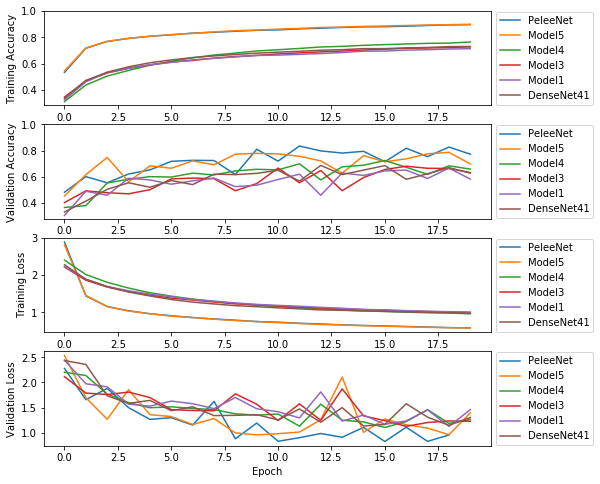

In [27]:
#Comparitive plots of accuracy and loss across all models
%matplotlib inline
%load_ext autoreload
%autoreload 2

plt.figure(figsize=(8, 8))
plt.subplot(4, 1, 1)
plt.plot(history_6.history['acc'], label='PeleeNet')
plt.plot(history_5.history['acc'], label='Model5')
plt.plot(history_4.history['acc'], label='Model4')
plt.plot(history_3.history['acc'], label='Model3')
# plt.plot(history_2.history['acc'], label='Model2')
plt.plot(history_1.history['acc'], label='Model1')
plt.plot(history_0.history['acc'], label='DenseNet41')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Training Accuracy')
plt.xlabel('Epoch')
plt.ylim([min(plt.ylim()),1])

plt.subplot(4, 1, 2)
plt.plot(history_6.history['val_acc'], label='PeleeNet')
plt.plot(history_5.history['val_acc'], label='Model5')
plt.plot(history_4.history['val_acc'], label='Model4')
plt.plot(history_3.history['val_acc'], label='Model3')
# plt.plot(history_2.history['val_acc'], label='Model2')
plt.plot(history_1.history['val_acc'], label='Model1')
plt.plot(history_0.history['val_acc'], label='DenseNet41')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylim([min(plt.ylim()),1])

plt.subplot(4, 1, 3)
plt.plot(history_6.history['loss'], label='PeleeNet')
plt.plot(history_5.history['loss'], label='Model5')
plt.plot(history_4.history['loss'], label='Model4')
plt.plot(history_3.history['loss'], label='Model3')
# plt.plot(history_2.history['loss'], label='Model2')
plt.plot(history_1.history['loss'], label='Model1')
plt.plot(history_0.history['loss'], label='DenseNet41')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Training Loss')
plt.xlabel('Epoch')

plt.subplot(4, 1, 4)
plt.plot(history_6.history['val_loss'], label='PeleeNet')
plt.plot(history_5.history['val_loss'], label='Model5')
plt.plot(history_4.history['val_loss'], label='Model4')
plt.plot(history_3.history['val_loss'], label='Model3')
# plt.plot(history_2.history['val_loss'], label='Model2')
plt.plot(history_1.history['val_loss'], label='Model1')
plt.plot(history_0.history['val_loss'], label='DenseNet41')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Validation Loss')
plt.xlabel('Epoch')

plt.show()